## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset

voice = pd.read_csv("C:/Users/Nil/Documents/GUVI PROJECT/Human Voice Clustering ML/data/vocal_gender_features_new.csv")
voice.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [3]:
# Basic information

voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [4]:
# Statistical Information

voice.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [5]:
#Check for duplicate rows

voice.duplicated().sum()

1078

In [6]:
#Remove the duplicated rows

voice = voice.drop_duplicates()

In [7]:
#Check for null values

voice.isnull().sum().any()

False

In [8]:
#Check Class Imbalance

voice['label'].value_counts()

label
1    9841
0    5229
Name: count, dtype: int64

In [9]:
#Separating Input and Output features

X = voice.drop('label',axis=1)
y = voice['label']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
#Standard Scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
#Scale after train test split because of data leakage

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Classification Models :

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [14]:
rf.fit(X_train_scale,y_train)
y_test_pred = rf.predict(X_test_scale)
y_train_pred = rf.predict(X_train_scale)

print("Accracy Score :", accuracy_score(y_train,y_train_pred))
print("Accracy Score :", accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accracy Score : 1.0
Accracy Score : 0.9943596549435966
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1079
           1       0.99      1.00      1.00      1935

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



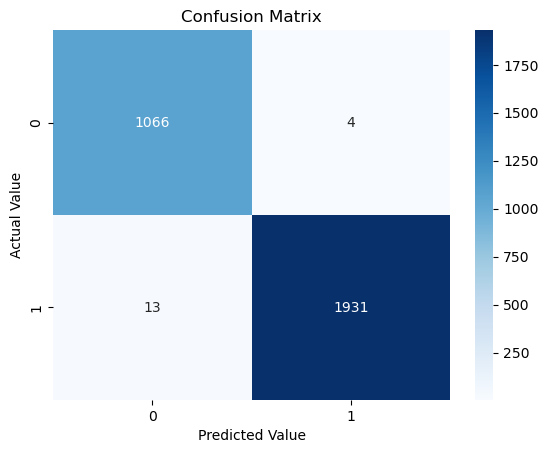

In [15]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

## Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

In [17]:
gb.fit(X_train_scale,y_train)
y_test_pred = gb.predict(X_test_scale)
y_train_pred = gb.predict(X_train_scale)

print("Accracy Score(Train) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Test) :", accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accracy Score(Train) : 0.9985899137358991
Accracy Score(Test) : 0.9913735899137359
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1079
           1       0.99      1.00      0.99      1935

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



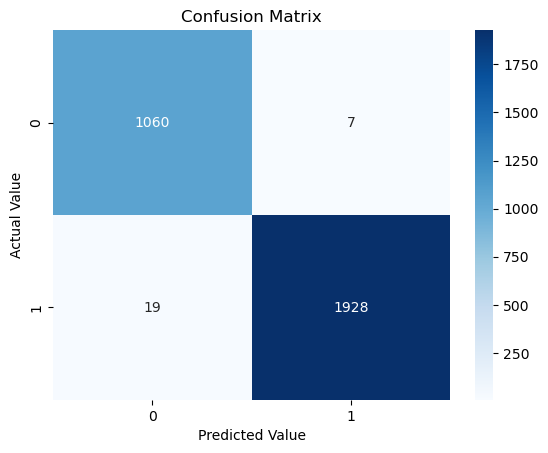

In [18]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

## SVC

In [19]:
from sklearn.svm import SVC

svc = SVC(probability=True)

In [20]:
svc.fit(X_train_scale,y_train)
y_test_pred = svc.predict(X_test_scale)
y_train_pred = svc.predict(X_train_scale)

print("Accracy Score(Train) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Test) :", accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accracy Score(Train) : 1.0
Accracy Score(Test) : 0.9993364299933643
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



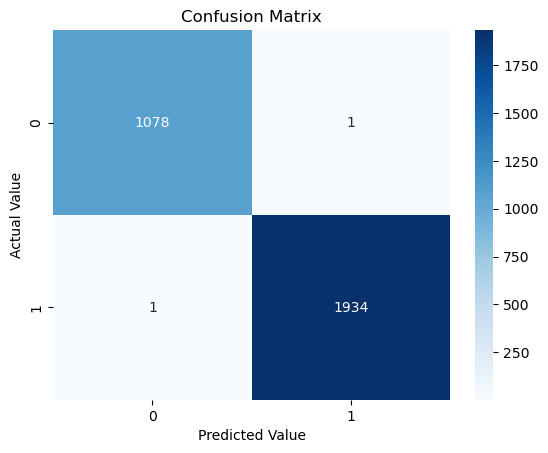

In [21]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

## Cross Validation

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline

models = [rf,gb,svc]

for model in models:
    pipeline = make_pipeline(scaler,model)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

    print(f"{model}:")
    print(f"F1 Score for each fold = {scores}")
    print(f"Average F1 Score = {scores.mean()}")

RandomForestClassifier():
F1 Score for each fold = [0.9944332  0.99721166 0.99746322 0.99518622 0.99771632]
Average F1 Score = 0.9964021216775221
GradientBoostingClassifier():
F1 Score for each fold = [0.99239351 0.99366608 0.99543842 0.99392405 0.99694967]
Average F1 Score = 0.9944743446920828
SVC(probability=True):
F1 Score for each fold = [1.         0.99949213 0.99923761 0.999238   0.99873064]
Average F1 Score = 0.9993396759872892


## Precision Recall Curve

RandomForestClassifier() PR AUC Score : 0.9999376084378839


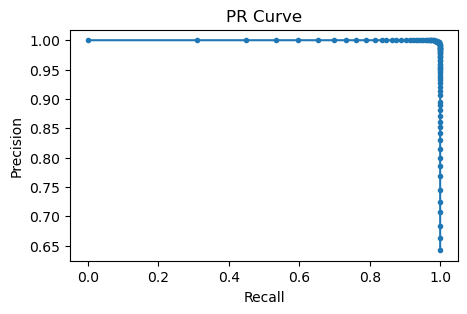

GradientBoostingClassifier() PR AUC Score : 0.9998206579809816


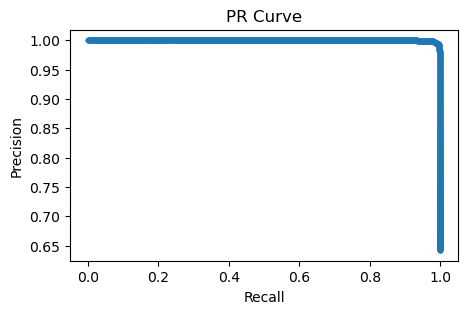

SVC(probability=True) PR AUC Score : 0.99999973299101


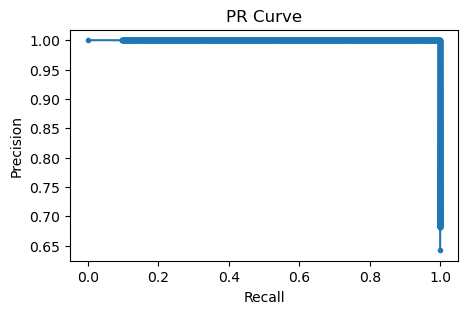

In [23]:
from sklearn.metrics import precision_recall_curve, auc

models = [rf,gb,svc]

#Plotting the PR Curve

for model in models:
    y_scores = model.predict_proba(X_test_scale)[:, 1]
    precision, recall, thresold = precision_recall_curve(y_test, y_scores)

    print(f"{model} PR AUC Score : {auc(recall, precision)}")
    plt.figure(figsize=(5,3))
    plt.plot(recall, precision, marker ='.')
    plt.title("PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

## Clustering :

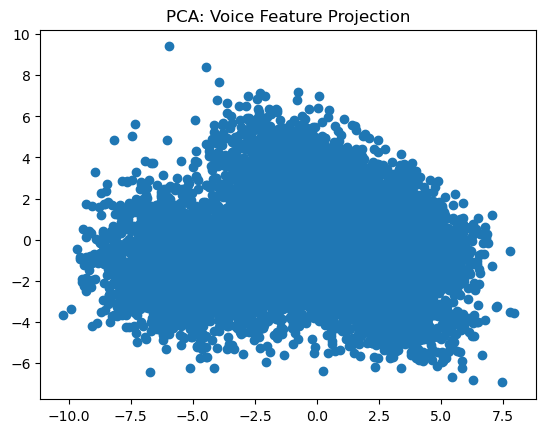

In [24]:
from sklearn.decomposition import PCA

X = voice.drop('label',axis=1)
X_scale = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA: Voice Feature Projection')
plt.show()


##  KMeans

  File "C:\Users\Nil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Nil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Nil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


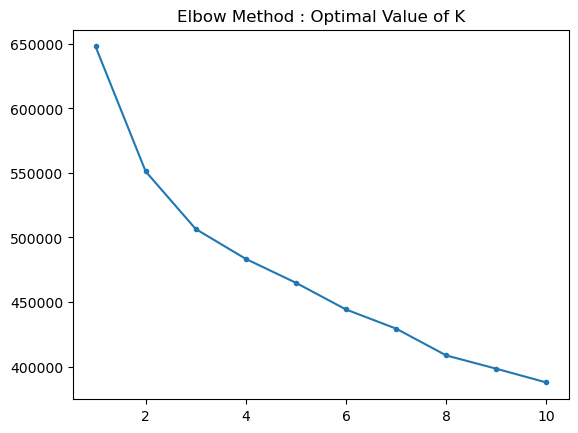

In [25]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)

#Elbow Plot

plt.plot(range(1,11), inertia, marker ='.')
plt.title("Elbow Method : Optimal Value of K")
plt.show()

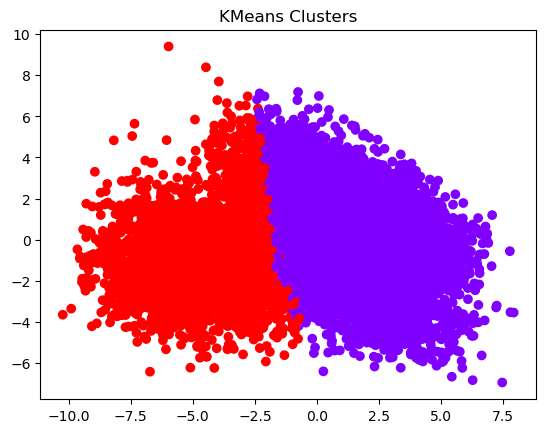

In [26]:
#At k=3, we see the elbow

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scale)

# visualize in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('KMeans Clusters')
plt.show()

In [27]:
set(kmeans_labels)

{0, 1}

In [28]:
print("Silhouette Score:", silhouette_score(X_scale, kmeans_labels))

Silhouette Score: 0.1745264670426607


## DBSCAN

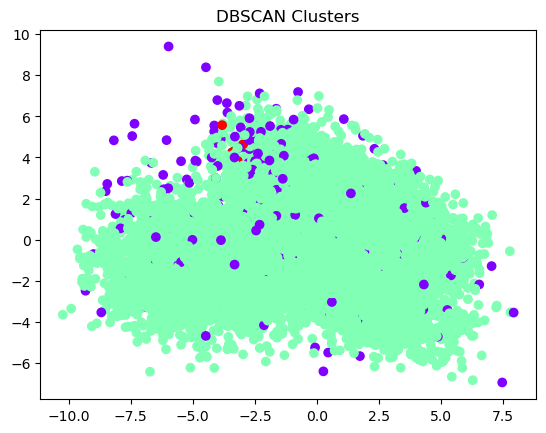

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scale)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clusters')
plt.show()

In [30]:
set(dbscan_labels)

{-1, 0, 1}

In [31]:
print("Silhouette Score:", silhouette_score(X_scale, dbscan_labels))

Silhouette Score: 0.23454360358918047


## Feature Selection by RandomForest

In [32]:
importance = rf.feature_importances_
column = X.columns

In [33]:
features = pd.DataFrame({'Columns' : column, 'Scores' : importance})
select_features = features.sort_values(by = 'Scores',ascending=False).head(15)
Inputs = select_features['Columns'].tolist()

In [34]:
X = voice[Inputs]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [36]:
svc = SVC()

In [37]:
svc.fit(X_train_scale,y_train)
y_test_pred = svc.predict(X_test_scale)
y_train_pred = svc.predict(X_train_scale)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accracy Score(Training) : 0.9991705374917054
Accracy Score(Testing) : 0.9983410749834107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



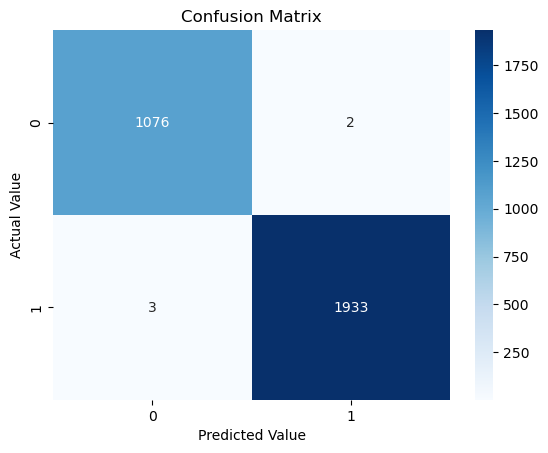

In [38]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [39]:
#Cross-Validation

pipeline = make_pipeline(scaler,svc)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')

print("F1-score per fold:", scores)
print("Average F1-score:", scores.mean())

F1-score per fold: [0.99898322 0.99771283 0.99872935 0.99847561 0.99898374]
Average F1-score: 0.998576951658124


## Hyper Parameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01,1]
        }

In [42]:
grid = GridSearchCV(estimator=svc, param_grid=param, cv= 5, scoring='f1',n_jobs=-1,verbose=2)

In [43]:
grid.fit(X_train_scale,y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9986716258962565


## Final model for deploy

In [44]:
svc = SVC(C=10, gamma='scale', kernel='rbf')
svc.fit(X_train_scale,y_train)
y_test_pred = svc.predict(X_test_scale)
y_train_pred = svc.predict(X_train_scale)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accracy Score(Training) : 0.9998341074983411
Accracy Score(Testing) : 0.9990046449900465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [45]:
from sklearn.metrics import f1_score

print(f1_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.9992250064582795
[[1077    2]
 [   1 1934]]


## Save the model

In [46]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(svc, "svc_model.pkl")

['svc_model.pkl']